In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# (a) Data Preparation
df = pd.read_csv('Spam_SMS.csv')
df['Class'] = df['Class'].map({'spam': 1, 'ham': 0})

# Split the dataset into training and testing sets
X = df['Message']
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform TF-IDF vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


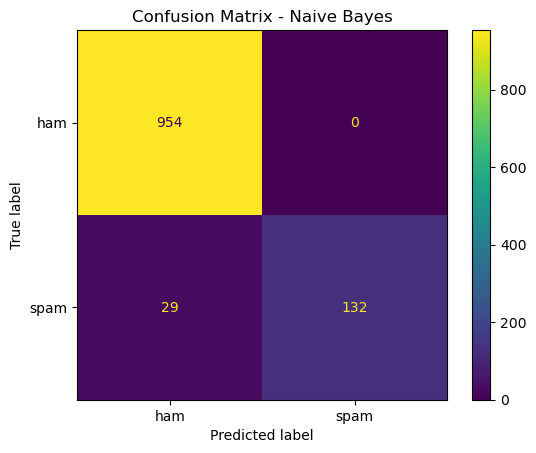

Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       954
           1       1.00      0.82      0.90       161

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115

Naive Bayes Model Performance:
Accuracy: 0.9739910313901345
Sensitivity (Spam Recall): 0.8198757763975155
Specificity (Ham Recall): 1.0


In [2]:
# (b) Naive Bayes Classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predict and evaluate performance
y_pred_nb = nb_model.predict(X_test_tfidf)

# Display results for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
ConfusionMatrixDisplay(cm_nb, display_labels=['ham', 'spam']).plot()
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

report_nb = classification_report(y_test, y_pred_nb)
print("Classification Report (Naive Bayes):\n", report_nb)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Calculate sensitivity (recall for spam)
sensitivity_nb = recall_score(y_test, y_pred_nb)

# Calculate specificity (recall for ham)
specificity_nb = cm_nb[0, 0] / (cm_nb[0, 0] + cm_nb[0, 1])

# Display metrics
print("Naive Bayes Model Performance:")
print(f"Accuracy: {accuracy_nb}")
print(f"Sensitivity (Spam Recall): {sensitivity_nb}")
print(f"Specificity (Ham Recall): {specificity_nb}")



KNN Accuracy: 0.8959641255605382


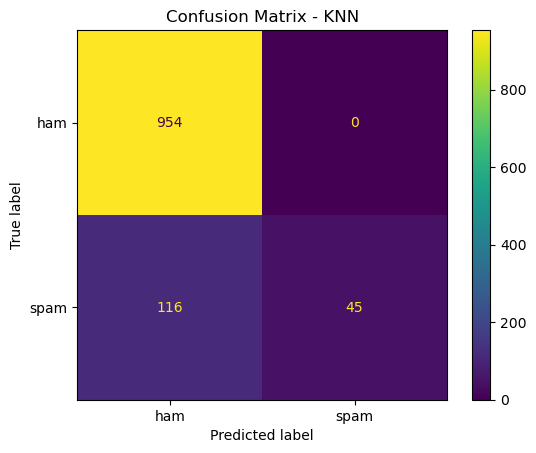

Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       954
           1       1.00      0.28      0.44       161

    accuracy                           0.90      1115
   macro avg       0.95      0.64      0.69      1115
weighted avg       0.91      0.90      0.87      1115



In [3]:
# (c) k-Nearest Neighbors (KNN) Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_tfidf, y_train)

# Predict and evaluate performance
y_pred_knn = knn_model.predict(X_test_tfidf)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

# Display results for KNN
print("KNN Accuracy:", accuracy_knn)
ConfusionMatrixDisplay(cm_knn, display_labels=['ham', 'spam']).plot()
plt.title("Confusion Matrix - KNN")
plt.show()
print("Classification Report (KNN):\n", report_knn)


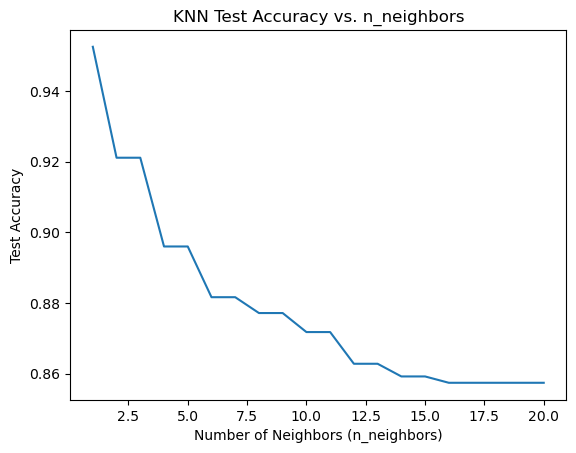

In [4]:
# Tune the 'n_neighbors' parameter
neighbors_range = range(1, 21)
accuracy_knn_tuned = []

for n_neighbors in neighbors_range:
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train_tfidf, y_train)
    y_pred_knn_tuned = knn_model.predict(X_test_tfidf)
    accuracy_knn_tuned.append(accuracy_score(y_test, y_pred_knn_tuned))

# Plot the results
plt.plot(neighbors_range, accuracy_knn_tuned)
plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Test Accuracy')
plt.title('KNN Test Accuracy vs. n_neighbors')
plt.show()


1
Accuracy of Best KNN Model: 0.9524663677130045
Sensitivity of Best KNN Model: 0.6708074534161491
Specificity of Best KNN Model: 1.0


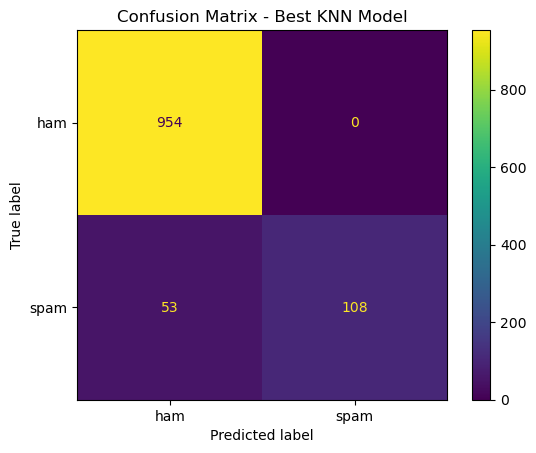

In [5]:
# Best KNN model with the optimal 'n_neighbors'
best_n_neighbors = neighbors_range[np.argmax(accuracy_knn_tuned)]
print(best_n_neighbors)
best_knn_model = KNeighborsClassifier(n_neighbors=best_n_neighbors)
best_knn_model.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred_knn_best = best_knn_model.predict(X_test_tfidf)

# Compute accuracy
accuracy_knn_best = accuracy_score(y_test, y_pred_knn_best)

# Compute sensitivity 
sensitivity_knn_best = recall_score(y_test, y_pred_knn_best)

# Compute specificity
cm_knn_best = confusion_matrix(y_test, y_pred_knn_best)
specificity_knn_best = cm_knn_best[0, 0] / (cm_knn_best[0, 0] + cm_knn_best[0, 1])

# Display the results
print("Accuracy of Best KNN Model:", accuracy_knn_best)
print("Sensitivity of Best KNN Model:", sensitivity_knn_best)
print("Specificity of Best KNN Model:", specificity_knn_best)

# Display the confusion matrix
ConfusionMatrixDisplay(cm_knn_best, display_labels=['ham', 'spam']).plot()
plt.title("Confusion Matrix - Best KNN Model")
plt.show()

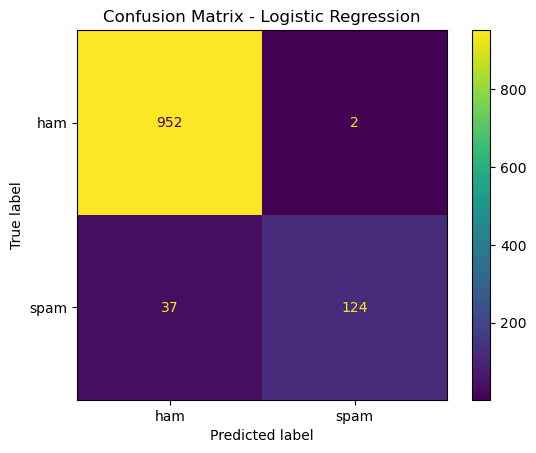

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       954
           1       0.98      0.77      0.86       161

    accuracy                           0.97      1115
   macro avg       0.97      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Logistic Regression Model Performance:
Accuracy: 0.9650224215246637
Sensitivity (Spam Recall): 0.7701863354037267
Specificity (Ham Recall): 0.9979035639412998


In [6]:
# (d) Logistic Regression Classifier
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_tfidf, y_train)

# Predict and evaluate performance
y_pred_logreg = logreg_model.predict(X_test_tfidf)

# Display results for Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
ConfusionMatrixDisplay(cm_logreg, display_labels=['ham', 'spam']).plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

report_logreg = classification_report(y_test, y_pred_logreg)
print("Classification Report (Logistic Regression):\n", report_logreg)

# Calculate accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)

# Calculate sensitivity (recall for spam)
sensitivity_logreg = recall_score(y_test, y_pred_logreg)

# Calculate specificity (recall for ham)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
specificity_logreg = cm_logreg[0, 0] / (cm_logreg[0, 0] + cm_logreg[0, 1])

# Display metrics
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_logreg}")
print(f"Sensitivity (Spam Recall): {sensitivity_logreg}")
print(f"Specificity (Ham Recall): {specificity_logreg}")



SVM Accuracy: 0.9811659192825112


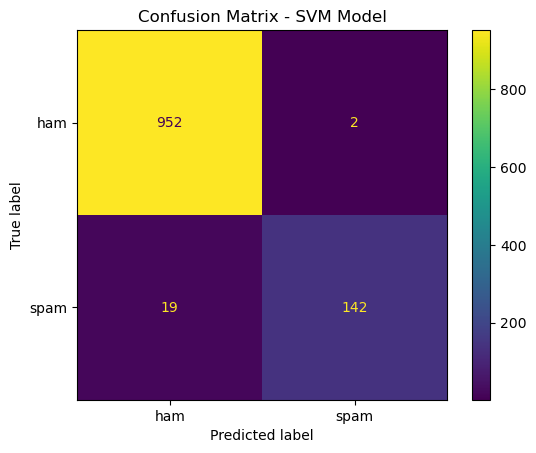

Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       954
           1       0.99      0.88      0.93       161

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Best SVM Model - Kernel: linear, C: 10, Accuracy: 0.9847533632286996


In [7]:
# (e) Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train_tfidf, y_train)

# Predict and evaluate performance
y_pred_svm = svm_model.predict(X_test_tfidf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

# Display results for SVM
print("SVM Accuracy:", accuracy_svm)
ConfusionMatrixDisplay(cm_svm, display_labels=['ham', 'spam']).plot()
plt.title("Confusion Matrix - SVM Model")
plt.show()
print("Classification Report (SVM):\n", report_svm)

# Tune the 'kernel' and 'C' parameters
kernels = ['linear', 'poly']
C_values = [0.1, 1, 10]
best_accuracy_svm = 0
best_model_svm = None

for kernel in kernels:
    for C in C_values:
        svm_model = SVC(kernel=kernel, C=C)
        svm_model.fit(X_train_tfidf, y_train)
        y_pred_svm = svm_model.predict(X_test_tfidf)
        accuracy_svm = accuracy_score(y_test, y_pred_svm)
        
        if accuracy_svm > best_accuracy_svm:
            best_accuracy_svm = accuracy_svm
            best_model_svm = svm_model
            best_kernel = kernel
            best_C = C

print(f"Best SVM Model - Kernel: {best_kernel}, C: {best_C}, Accuracy: {best_accuracy_svm}")


Best SVM Model Performance:
Accuracy: 0.9847533632286996
Sensitivity (Spam Recall): 0.9130434782608695
Specificity (Ham Recall): 0.9968553459119497


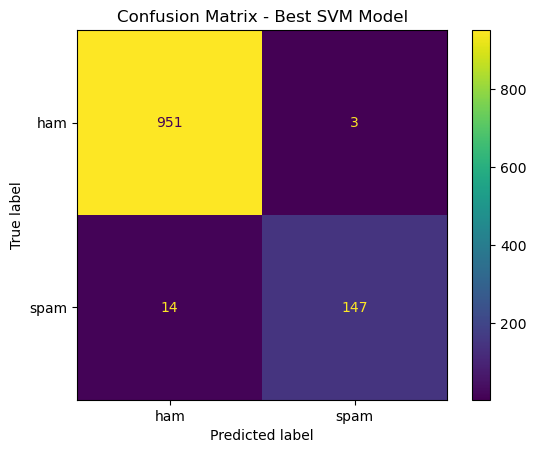

In [8]:
# Predict on the test data using the best SVM model
y_pred_best_svm = best_model_svm.predict(X_test_tfidf)

# Compute accuracy
accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)

# Compute sensitivity (recall for spam)
sensitivity_best_svm = recall_score(y_test, y_pred_best_svm)

# Compute specificity (recall for ham)
cm_best_svm = confusion_matrix(y_test, y_pred_best_svm)
specificity_best_svm = cm_best_svm[0, 0] / (cm_best_svm[0, 0] + cm_best_svm[0, 1])

# Display results
print("Best SVM Model Performance:")
print(f"Accuracy: {accuracy_best_svm}")
print(f"Sensitivity (Spam Recall): {sensitivity_best_svm}")
print(f"Specificity (Ham Recall): {specificity_best_svm}")

# Display the confusion matrix for the best SVM model
ConfusionMatrixDisplay(cm_best_svm, display_labels=['ham', 'spam']).plot()
plt.title("Confusion Matrix - Best SVM Model")
plt.show()


Random Forest Model Performance:
Accuracy: 0.979372197309417
Sensitivity (Spam Recall): 0.8571428571428571
Specificity (Ham Recall): 1.0


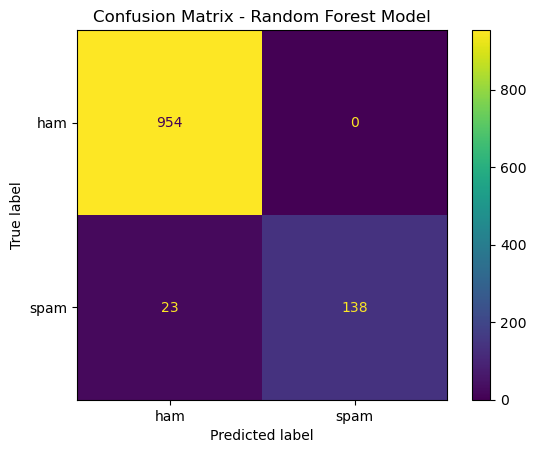

In [9]:
# Random Forest model with corrected parameters
rf_model = RandomForestClassifier(
    n_estimators=100,   # Number of trees in the forest
    max_depth=None,     # No maximum depth
    max_features='sqrt',  # square root of number of features for classification
    random_state=42     # Ensures reproducibility
)
rf_model.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test_tfidf)

# Compute accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Compute sensitivity (recall for spam)
sensitivity_rf = recall_score(y_test, y_pred_rf)

# Compute specificity (recall for ham)
cm_rf = confusion_matrix(y_test, y_pred_rf)
specificity_rf = cm_rf[0, 0] / (cm_rf[0, 0] + cm_rf[0, 1])

# Display results
print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy_rf}")
print(f"Sensitivity (Spam Recall): {sensitivity_rf}")
print(f"Specificity (Ham Recall): {specificity_rf}")

# Display the confusion matrix
ConfusionMatrixDisplay(cm_rf, display_labels=['ham', 'spam']).plot()
plt.title("Confusion Matrix - Random Forest Model")
plt.show()


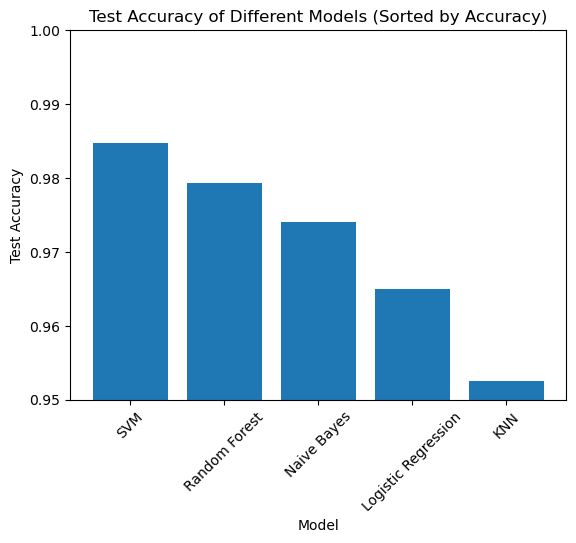

Models sorted by accuracy (descending): ('SVM', 'Random Forest', 'Naive Bayes', 'Logistic Regression', 'KNN')
Corresponding accuracies: ['0.985', '0.979', '0.974', '0.965', '0.952']
Corresponding sensitivities: ['0.913', '0.857', '0.820', '0.770', '0.671']
Corresponding specificities: ['0.997', '1.000', '1.000', '0.998', '1.000']


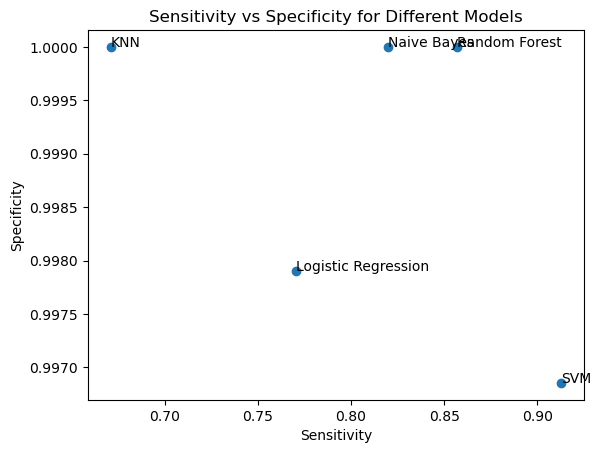

In [10]:
# (g) Plotting Model Performance

# Define values to be plotted using saved variables from above
accuracies = {
    'Naive Bayes': accuracy_nb,
    'KNN': accuracy_knn_best,
    'Logistic Regression': accuracy_logreg,
    'SVM': best_accuracy_svm,
    'Random Forest': accuracy_rf
}

models = list(accuracies.keys())
accuracy_values = list(accuracies.values())

sensitivity = [
    sensitivity_nb,        
    sensitivity_knn_best,  
    sensitivity_logreg,    
    sensitivity_best_svm,  
    sensitivity_rf         
]

specificity = [
    specificity_nb,      
    specificity_knn_best,  
    specificity_logreg,    
    specificity_best_svm,  
    specificity_rf         
]


# Sort models, accuracies, sensitivity, and specificity by accuracy in descending order
sorted_data = sorted(zip(accuracy_values, models, sensitivity, specificity), reverse=True)
accuracy_values_sorted, models_sorted, sensitivity_sorted, specificity_sorted = zip(*sorted_data)

# Bar chart for test accuracy
plt.bar(models_sorted, accuracy_values_sorted)
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy of Different Models (Sorted by Accuracy)')
plt.xticks(rotation=45)
plt.ylim(0.95, 1.0)  # Adjusted y-axis for better visibility
plt.show()

# Print sorted results for verification
print("Models sorted by accuracy (descending):", models_sorted)
print("Corresponding accuracies:", [f"{acc:.3f}" for acc in accuracy_values_sorted])
print("Corresponding sensitivities:", [f"{sens:.3f}" for sens in sensitivity_sorted])
print("Corresponding specificities:", [f"{spec:.3f}" for spec in specificity_sorted])

# Scatterplot for sensitivity vs specificity
plt.scatter(sensitivity_sorted, specificity_sorted)
for i, model in enumerate(models_sorted):
    plt.annotate(model, (sensitivity_sorted[i], specificity_sorted[i]))

plt.xlabel('Sensitivity')
plt.ylabel('Specificity')
plt.title('Sensitivity vs Specificity for Different Models')
plt.show()


In [11]:
# Problem 2

In [12]:
# Import necessary libraries for neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_score

# Reuse TF-IDF vectorization - same as  Problem 1
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Convert TF-IDF matrices to dense arrays for Keras compatibility
X_train_tfidf = X_train_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()

# A simple neural network architecture
nn_model = Sequential([
    Dense(128, input_shape=(X_train_tfidf.shape[1],), activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Output with sigmoid for binary classification
])

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


In [13]:

# Train the model
history = nn_model.fit(X_train_tfidf, y_train, epochs=10, batch_size=32, validation_data=(X_test_tfidf, y_test))


Epoch 1/10


2024-11-18 22:32:44.960260: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


140/140 [==============================] - 0s 2ms/step - loss: 0.3063 - accuracy: 0.8854 - val_loss: 0.1120 - val_accuracy: 0.9803
Epoch 2/10
140/140 [==============================] - 0s 1ms/step - loss: 0.0464 - accuracy: 0.9872 - val_loss: 0.0536 - val_accuracy: 0.9857
Epoch 3/10
140/140 [==============================] - 0s 1ms/step - loss: 0.0112 - accuracy: 0.9973 - val_loss: 0.0577 - val_accuracy: 0.9848
Epoch 4/10
140/140 [==============================] - 0s 1ms/step - loss: 0.0052 - accuracy: 0.9989 - val_loss: 0.0604 - val_accuracy: 0.9848
Epoch 5/10
140/140 [==============================] - 0s 1ms/step - loss: 0.0027 - accuracy: 0.9996 - val_loss: 0.0661 - val_accuracy: 0.9857
Epoch 6/10
140/140 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0666 - val_accuracy: 0.9865
Epoch 7/10
140/140 [==============================] - 0s 1ms/step - loss: 6.1355e-04 - accuracy: 1.0000 - val_loss: 0.0742 - val_accuracy: 0.9857
Epoch 8/10
14

In [17]:
# Predict on test data
y_pred_nn = (nn_model.predict(X_test_tfidf) > 0.5).astype("int32").flatten()

# Calculate accuracy, sensitivity, and specificity
accuracy_nn = accuracy_score(y_test, y_pred_nn)
sensitivity_nn = recall_score(y_test, y_pred_nn)  
specificity_nn = recall_score(y_test, y_pred_nn, pos_label=0)  
print("Neural Network Accuracy:", accuracy_nn)
print("Neural Network Sensitivity:", sensitivity_nn)
print("Neural Network Specificity:", specificity_nn)

35/35 [==============================] - 0s 544us/step
Neural Network Accuracy: 0.9865470852017937
Neural Network Sensitivity: 0.9192546583850931
Neural Network Specificity: 0.9979035639412998


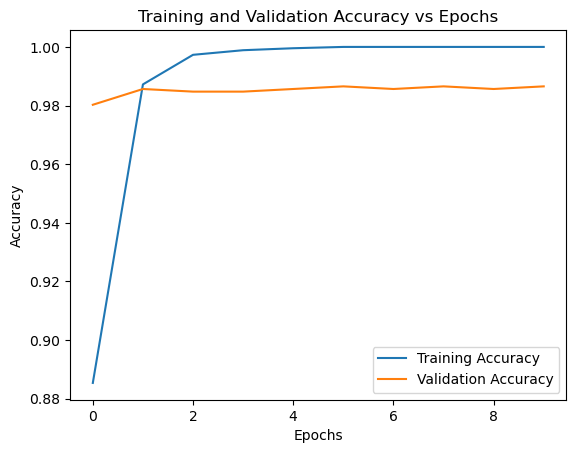

In [18]:
# Plotting validation accuracy vs. epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy vs Epochs')
plt.legend()
plt.show()


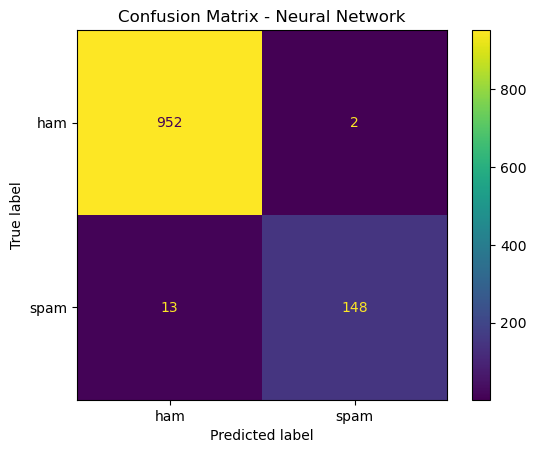

In [19]:
# Confusion Matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
ConfusionMatrixDisplay(cm_nn, display_labels=['ham', 'spam']).plot()
plt.title("Confusion Matrix - Neural Network")
plt.show()


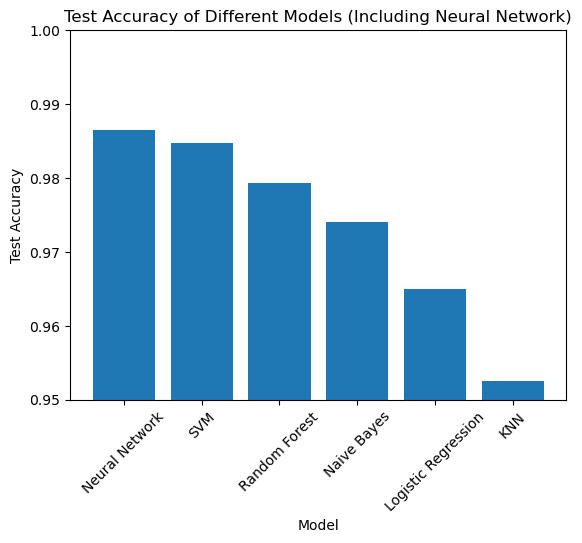

Models sorted by accuracy (descending): ('Neural Network', 'SVM', 'Random Forest', 'Naive Bayes', 'Logistic Regression', 'KNN')
Corresponding accuracies: ['0.987', '0.985', '0.979', '0.974', '0.965', '0.952']
Corresponding sensitivities: ['0.919', '0.913', '0.857', '0.820', '0.770', '0.671']
Corresponding specificities: ['0.998', '0.997', '1.000', '1.000', '0.998', '1.000']


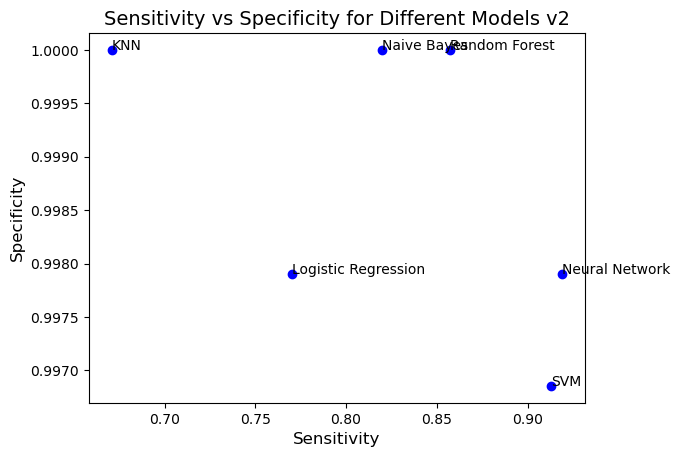

In [21]:
# Add Neural Network results to the comparison
accuracies['Neural Network'] = accuracy_nn
sensitivity.append(sensitivity_nn)
specificity.append(specificity_nn)

# Re-extract models and accuracy values after including the Neural Network
models = list(accuracies.keys())
accuracy_values = list(accuracies.values())

# Sort by accuracy in descending order
sorted_data = sorted(zip(accuracy_values, models, sensitivity, specificity), reverse=True)
accuracy_values_sorted, models_sorted, sensitivity_sorted, specificity_sorted = zip(*sorted_data)

# Bar chart for test accuracy (including Neural Network)
plt.bar(models_sorted, accuracy_values_sorted)
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy of Different Models (Including Neural Network)')
plt.xticks(rotation=45)
plt.ylim(0.95, 1.0)  # Adjusted y-axis for better visibility
plt.show()

# Print sorted results for verification
print("Models sorted by accuracy (descending):", models_sorted)
print("Corresponding accuracies:", [f"{acc:.3f}" for acc in accuracy_values_sorted])
print("Corresponding sensitivities:", [f"{sens:.3f}" for sens in sensitivity_sorted])
print("Corresponding specificities:", [f"{spec:.3f}" for spec in specificity_sorted])

# Scatterplot for sensitivity vs specificity (including Neural Network)
plt.scatter(sensitivity_sorted, specificity_sorted, color='blue')

# Annotate each point with the corresponding model
for i, model in enumerate(models_sorted):
    plt.annotate(model, (sensitivity_sorted[i], specificity_sorted[i]), fontsize=10)

# Label the axes and set title
plt.xlabel('Sensitivity', fontsize=12)
plt.ylabel('Specificity', fontsize=12)
plt.title('Sensitivity vs Specificity for Different Models v2', fontsize=14)


# Show the plot
plt.show()
